In [43]:
# ===============================
# 1. Import Required Libraries
# ===============================
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score

# For reproducibility
np.random.seed(42)
print("Libraries imported successfully!")

Libraries imported successfully!


In [44]:
# ===============================
# 2. Load & Inspect Dataset
# ===============================
iris = load_iris()
X = iris.data
y = iris.target
feature_names = iris.feature_names
class_names = iris.target_names

print("Dataset Shape:", X.shape)  # (150, 4)
print("Number of Classes:", len(class_names))
print("Feature Names:", feature_names)
print("Class Names:", class_names)
print("First 5 samples:\n", X[:5])
print("First 5 labels:", y[:5])

Dataset Shape: (150, 4)
Number of Classes: 3
Feature Names: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Class Names: ['setosa' 'versicolor' 'virginica']
First 5 samples:
 [[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]
First 5 labels: [0 0 0 0 0]


In [45]:
# ===============================
# 3. Train-Test Split
# ===============================
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"Training samples: {X_train.shape[0]}")
print(f"Testing samples: {X_test.shape[0]}")

Training samples: 120
Testing samples: 30


In [46]:
# ===============================
# 4. Helper Function: Evaluate Model (FIXED)
# ===============================
def evaluate_model(model, X_train, y_train, X_test, y_test, label="Model"):
    """
    Fits the model and prints training/testing accuracy.
    Returns the accuracies.
    """
    model.fit(X_train, y_train)

    train_pred = model.predict(X_train)
    test_pred = model.predict(X_test)

    train_acc = accuracy_score(y_train, train_pred)
    test_acc = accuracy_score(y_test, test_pred)

    # This print will ALWAYS appear
    print(f"\n{'='*50}")
    print(f"  {label}")
    print(f"{'='*50}")
    print(f"Training Accuracy : {train_acc:.4f} ({train_acc*100:.2f}%)")
    print(f"Testing Accuracy  : {test_acc:.4f}  ({test_acc*100:.2f}%)")
    print(f"{'='*50}\n")

    return train_acc, test_acc

In [48]:
# ===============================
# 5. Helper Function: Visualize Tree (FIXED)
# ===============================
def visualize_tree(model, title="Decision Tree", max_depth=None):
    """
    Displays the decision tree. Works reliably in all notebooks.
    """
    plt.figure(figsize=(16, 10))
    plot_tree(
        model,
        filled=True,
        feature_names=feature_names,
        class_names=class_names,
        rounded=True,
        fontsize=9,
        proportion=True,
        precision=2,
        impurity=True,
        max_depth=max_depth  # limits display depth for very deep trees
    )
    plt.title(title, fontsize=18, pad=20)
    plt.tight_layout()
    plt.show()  # This forces the plot to appear

Training the baseline (unpruned) decision tree...


  Baseline Decision Tree (No Pruning – Likely Overfitting)
Training Accuracy : 1.0000 (100.00%)
Testing Accuracy  : 0.9333  (93.33%)



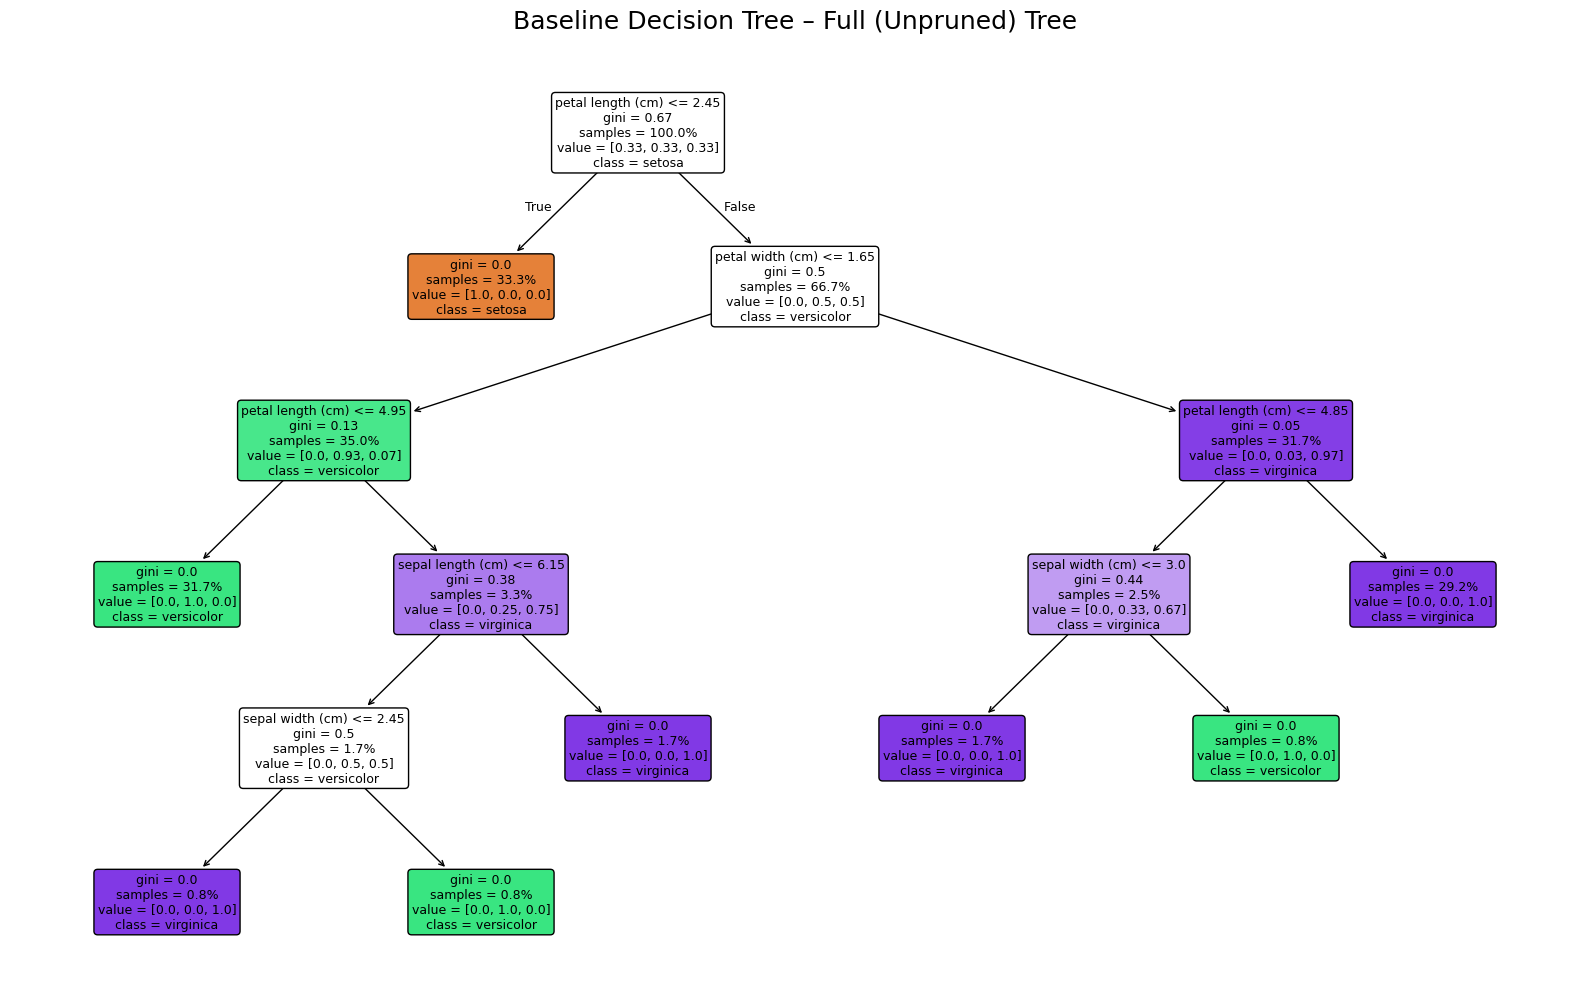

Baseline tree visualization complete!


In [49]:
# ===============================
# 6. Train & Visualize Baseline (Unpruned) Tree – FIXED
# ===============================
print("Training the baseline (unpruned) decision tree...\n")

baseline_clf = DecisionTreeClassifier(random_state=42)
baseline_train_acc, baseline_test_acc = evaluate_model(
    baseline_clf,
    X_train, y_train,
    X_test, y_test,
    label="Baseline Decision Tree (No Pruning – Likely Overfitting)"
)

# Explicitly visualize the full tree
visualize_tree(
    baseline_clf,
    title="Baseline Decision Tree – Full (Unpruned) Tree",
    max_depth=6  # Limits display depth so it remains readable
)

print("Baseline tree visualization complete!")

Training decision trees with different max_depth values...


  Tree with max_depth = 1
Training Accuracy : 0.6667 (66.67%)
Testing Accuracy  : 0.6667  (66.67%)



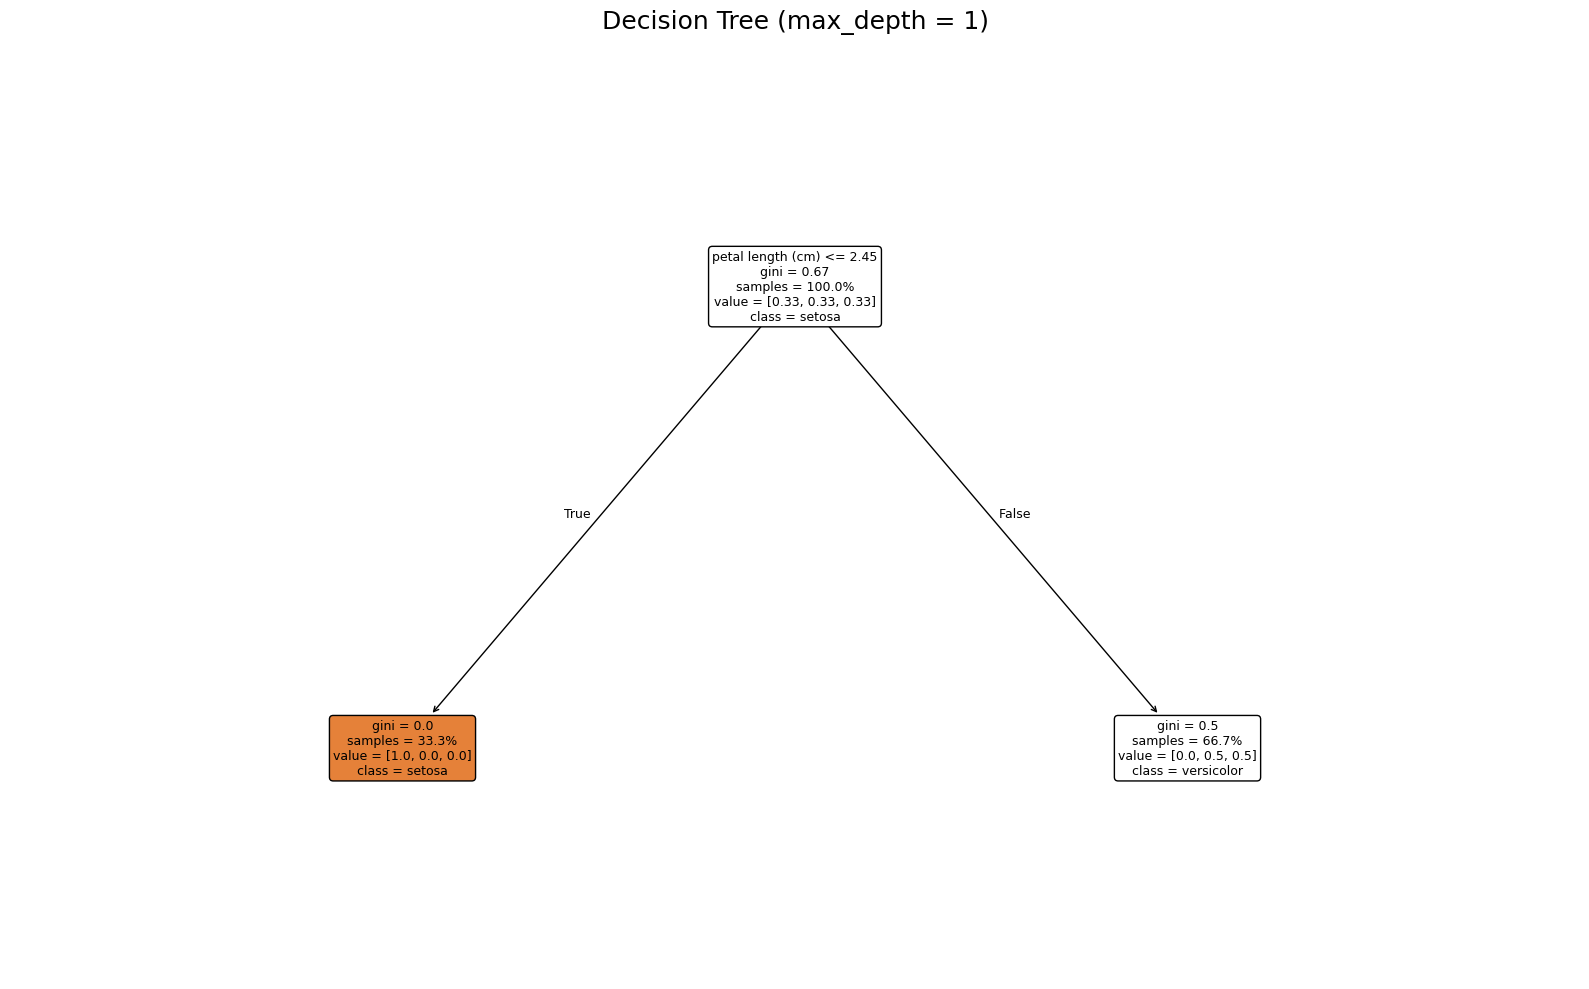


  Tree with max_depth = 2
Training Accuracy : 0.9667 (96.67%)
Testing Accuracy  : 0.9333  (93.33%)



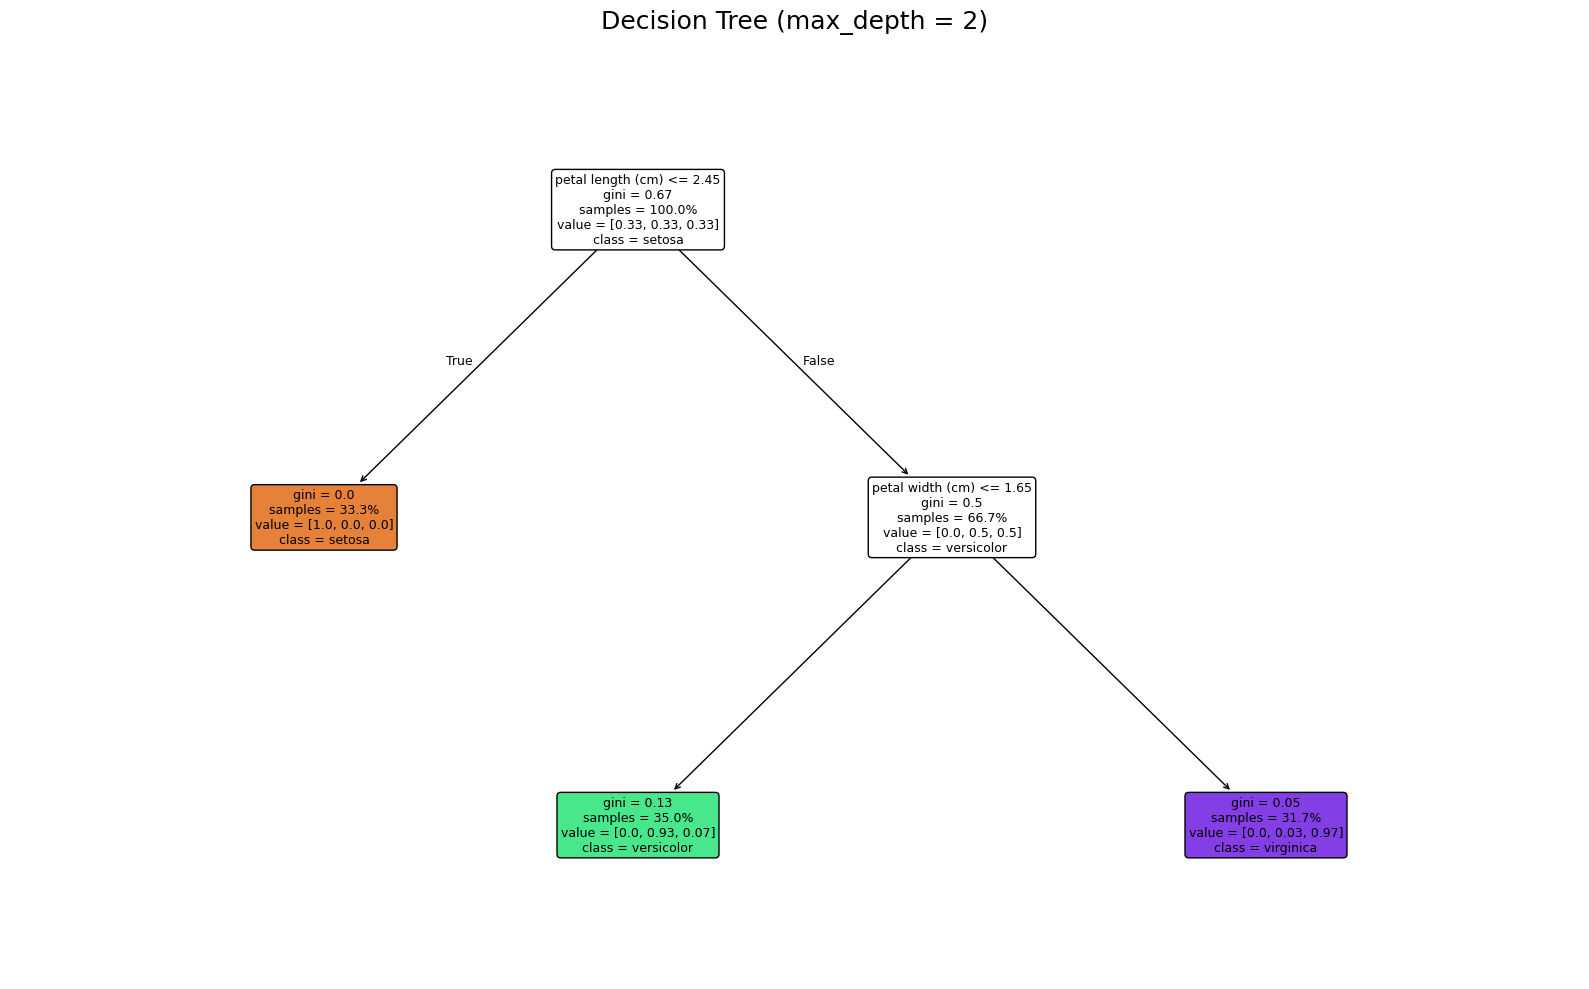


  Tree with max_depth = 3
Training Accuracy : 0.9833 (98.33%)
Testing Accuracy  : 0.9667  (96.67%)



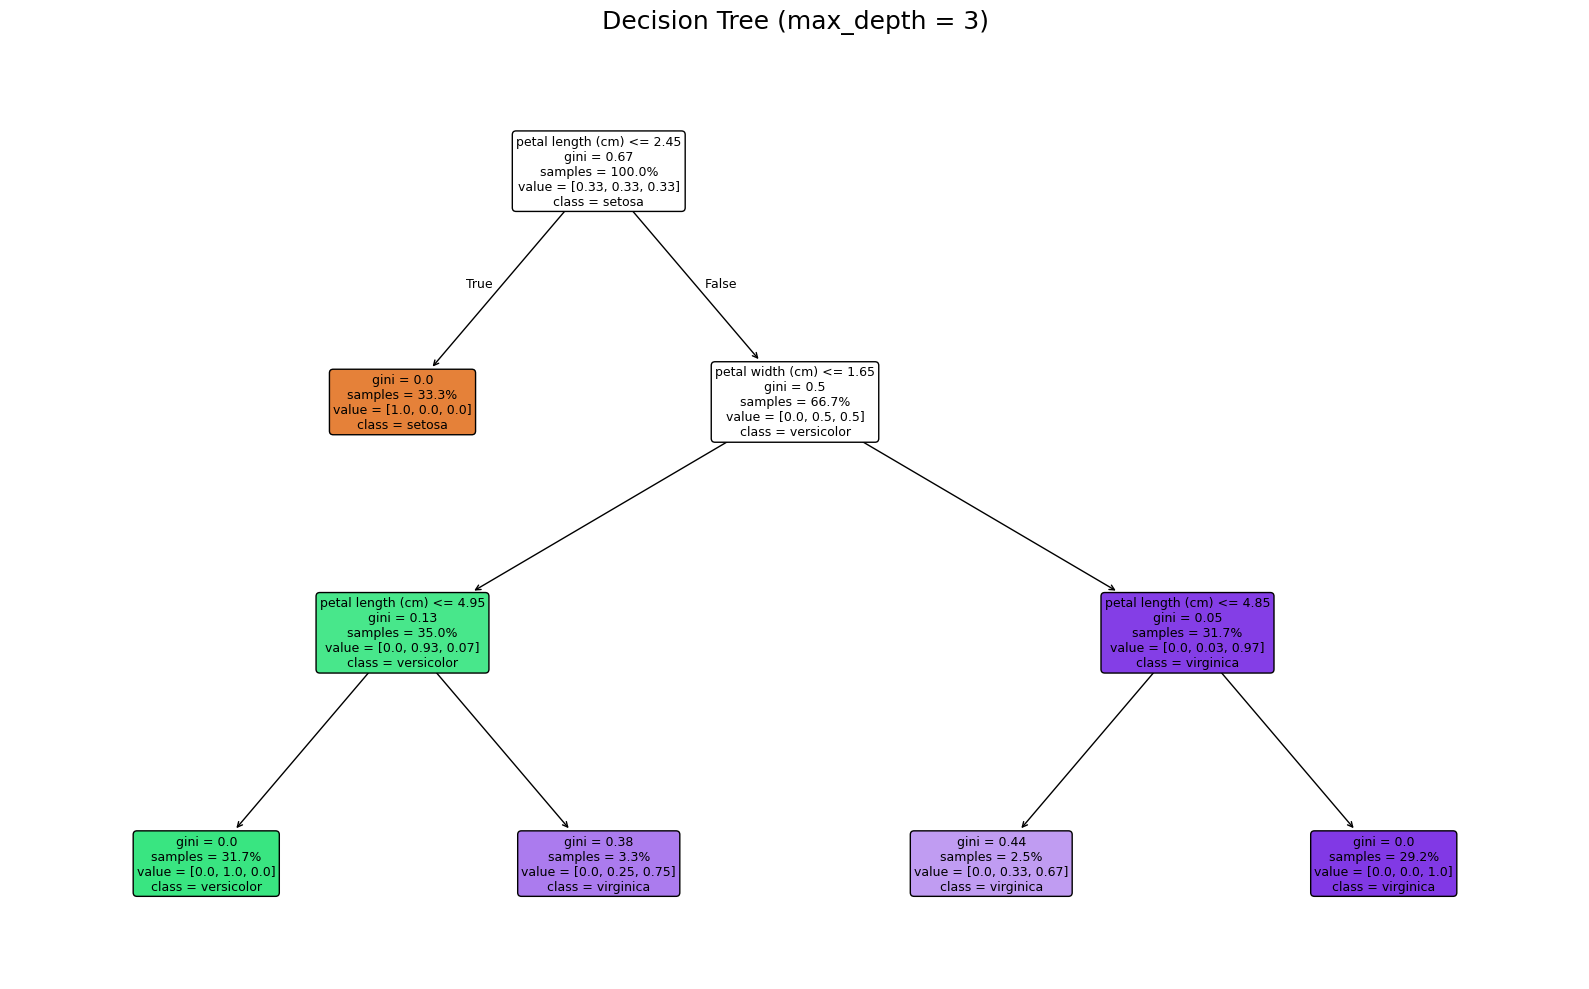


  Tree with max_depth = 4
Training Accuracy : 0.9917 (99.17%)
Testing Accuracy  : 0.9333  (93.33%)



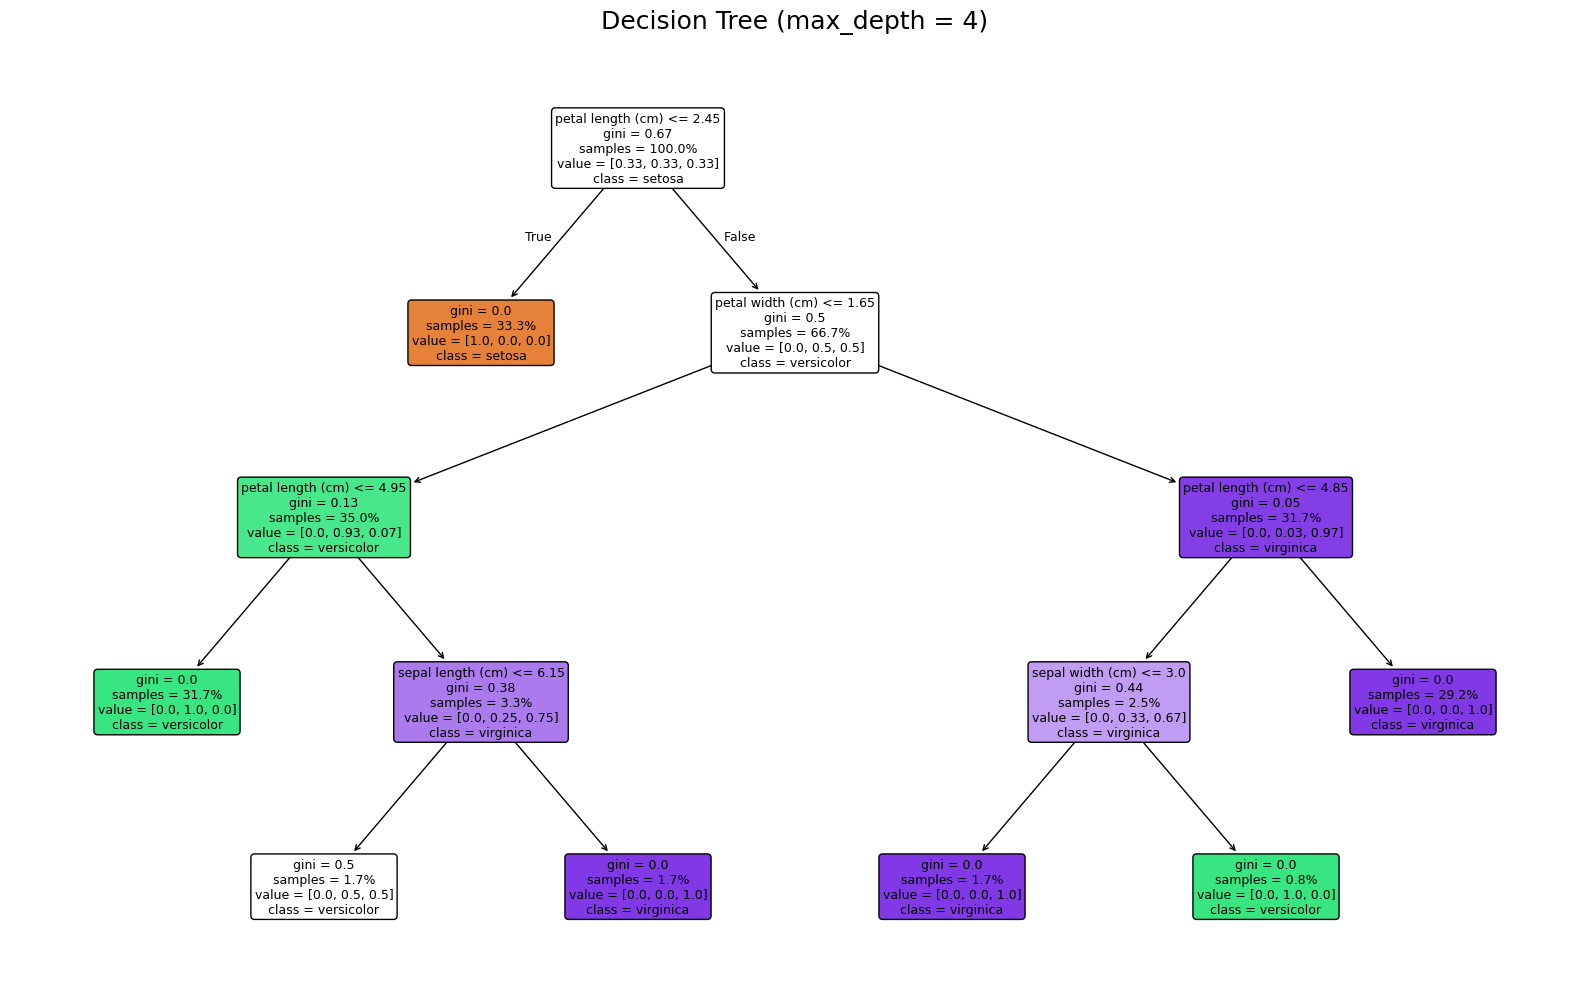


  Tree with max_depth = 5
Training Accuracy : 1.0000 (100.00%)
Testing Accuracy  : 0.9333  (93.33%)


  Tree with max_depth = Unlimited Depth
Training Accuracy : 1.0000 (100.00%)
Testing Accuracy  : 0.9333  (93.33%)



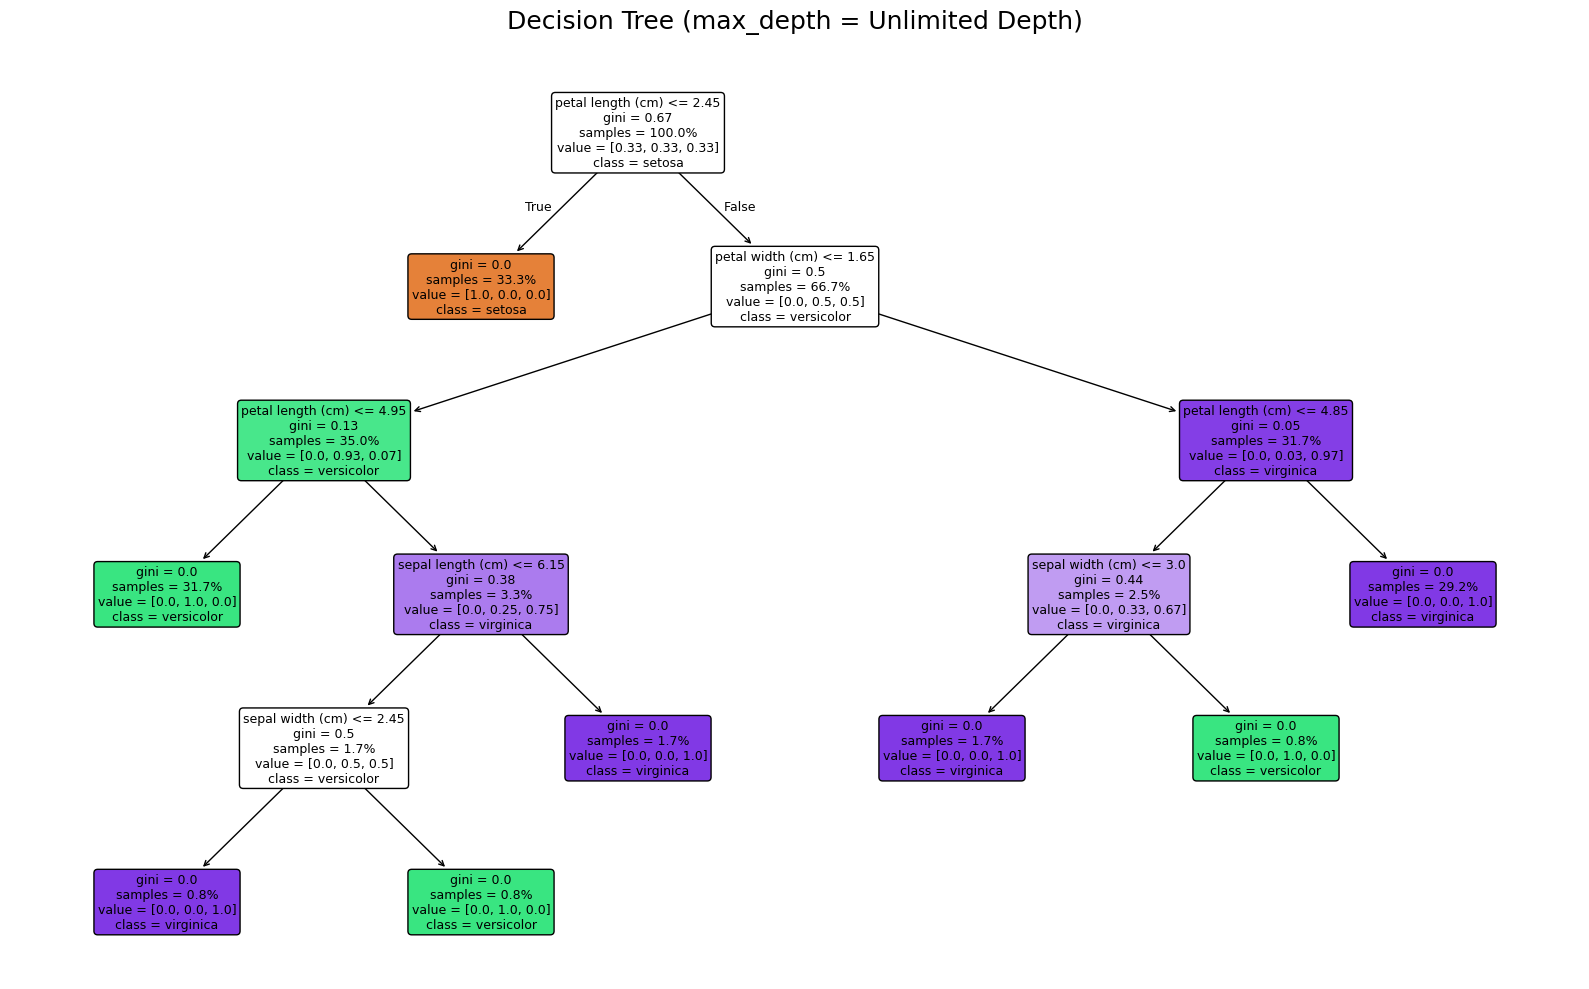

In [53]:
# ===============================
# 7. Effect of max_depth (Pre-Pruning)
# ===============================
max_depth_values = [1, 2, 3, 4, 5, None]  # None means no limit
results = []

print("Training decision trees with different max_depth values...\n")

for depth in max_depth_values:
    depth_label = f"Unlimited Depth" if depth is None else depth
    clf = DecisionTreeClassifier(max_depth=depth, random_state=42)

    train_acc, test_acc = evaluate_model(
        clf, X_train, y_train, X_test, y_test,
        label=f"Tree with max_depth = {depth_label}"
    )

    results.append({
        'depth': depth_label,
        'train_acc': train_acc,
        'test_acc': test_acc
    })

    # Visualize only small trees to avoid clutter
    if depth is None or depth <= 4:
        title = f"Decision Tree (max_depth = {depth_label})"
        visualize_tree(clf, title)

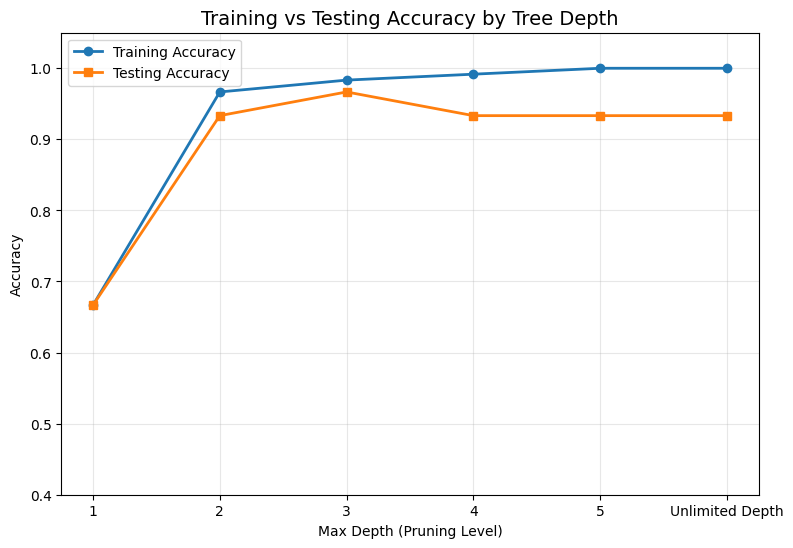

In [51]:
# ===============================
# 8. Accuracy vs Depth Plot
# ===============================
depths = [r['depth'] for r in results]
train_accs = [r['train_acc'] for r in results]
test_accs = [r['test_acc'] for r in results]

# Convert None to a string for plotting
plot_depths = [str(d) if d is not None else "None" for d in depths]

plt.figure(figsize=(9, 6))
plt.plot(plot_depths, train_accs, marker='o', label='Training Accuracy', linewidth=2)
plt.plot(plot_depths, test_accs, marker='s', label='Testing Accuracy', linewidth=2)

plt.title("Training vs Testing Accuracy by Tree Depth", fontsize=14)
plt.xlabel("Max Depth (Pruning Level)")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True, alpha=0.3)
plt.ylim(0.4, 1.05)
plt.show()

In [52]:
# ===============================
# 9. Final Summary
# ===============================
print("\n" + "="*60)
print("SUMMARY: Accuracy vs Tree Depth")
print("="*60)
print(f"{'Depth':<15} {'Train Acc':<12} {'Test Acc':<12} {'Overfitting?'}")
print("-"*60)

for r in results:
    depth_str = str(r['depth'])
    overfitting = "Yes" if (r['train_acc'] - r['test_acc']) > 0.1 else "No"
    print(f"{depth_str:<15} {r['train_acc']:.4f}{'':8} {r['test_acc']:.4f}{'':9} {overfitting}")

print("\nInsight: Best generalization often at depth=3 or 4 for Iris dataset.")
print("Deeper trees overfit (high train acc, lower test acc).")
print("Script completed successfully! ")


SUMMARY: Accuracy vs Tree Depth
Depth           Train Acc    Test Acc     Overfitting?
------------------------------------------------------------
1               0.6667         0.6667          No
2               0.9667         0.9333          No
3               0.9833         0.9667          No
4               0.9917         0.9333          No
5               1.0000         0.9333          No
Unlimited Depth 1.0000         0.9333          No

Insight: Best generalization often at depth=3 or 4 for Iris dataset.
Deeper trees overfit (high train acc, lower test acc).
Script completed successfully! 
